<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


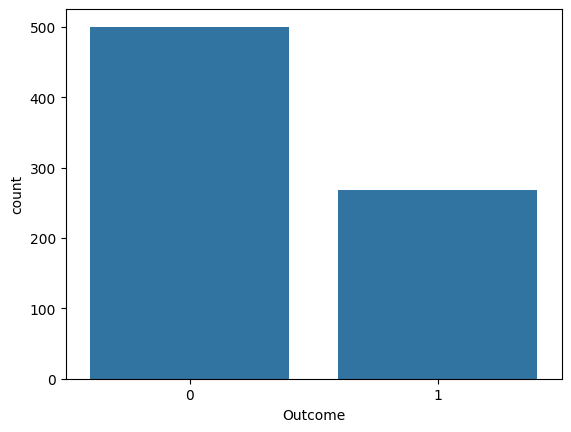

/tmp/ipython-input-2573058732.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Glucose'].fillna(df['Glucose'].median(), inplace=True)
/tmp/ipython-input-2573058732.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

Decision Tree Results
Accuracy: 0.6688311688311688
              precision    recall  f1-score   support

           0       0.77      0.69      0.73        99
           1       0.53      0.64      0.58        55

    accuracy                           0.67       154
   macro avg       0.65      0.66      0.65       154
weighted avg       0.69      0.67      0.67       154

Random Forest Results
Accuracy: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        99
           1       0.66      0.73      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.77      0.77       154



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset :-
df = pd.read_csv('/content/diabetes.csv')
df.head()

# EDA Part :-
df.shape
df.info()
df.describe()

# Tget column :-  1 for diabetes and 0 for no diabetes.

# Checking for imbalance data
df['Outcome'].value_counts()
sns.countplot(x='Outcome', data=df)
plt.show()

# Handle Missing Value
# Some medical values cannot be 0.
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

df.isnull().sum()


# Fill Missing Values
df['Glucose'].fillna(df['Glucose'].median(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)


# Split dataset for model building
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

# I compared models instead of assuming one.

# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression(max_iter=1000)
# lr.fit(X_train_scaled, y_train)
# y_pred_lr = lr.predict(X_test_scaled)

# Decision Tree initializing
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, y_train)
# PRedicted data from DT
y_pred_dt = model1.predict(X_test)

# Now initializing Random Forest for comparision
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)
y_pred_rf = model2.predict(X_test)

#checking accuracy of models
from sklearn.metrics import accuracy_score, classification_report
print(f'Decision Tree Accuracy Score : {accuracy_score(y_test, y_pred_dt)}')
print(classification_report(y_test, y_pred_dt))

print(f'Random Forest Accuracy score : {accuracy_score(y_test, y_pred_rf)}')
print(classification_report(y_test, y_pred_rf))
